<a href="https://colab.research.google.com/github/josesg998/redesn_2024/blob/main/Clase%204/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q --upgrade keras-cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 12.1 MB/s eta 0:00:00


In [2]:
import keras
import keras_cv
from keras_cv import visualization
import numpy as np

Using TensorFlow backend


In [3]:
# Cargamos el modelo preentrenado con PASCAL VOC
# Más opciones (más modelos) en https://keras.io/api/keras_cv/models/tasks/yolo_v8_detector/#yolov8detector-class

pretrained_model_name = "yolo_v8_m_pascalvoc"

# Estas son las clases del modelo preentrenado
class_names = ["Aeroplane", "Bicycle", "Bird", "Boat", "Bottle", "Bus", "Car", "Cat", "Chair",
               "Cow", "Dining Table", "Dog", "Horse", "Motorbike", "Person", "Potted Plant",
               "Sheep", "Sofa", "Train", "Tvmonitor", "Total",
              ]

# Creamos el diccionario de clases
class_dict = dict(zip(range(len(class_names)), class_names))

In [21]:
# Archivo con la imagen a analizar
image_file = "pity.jpg"

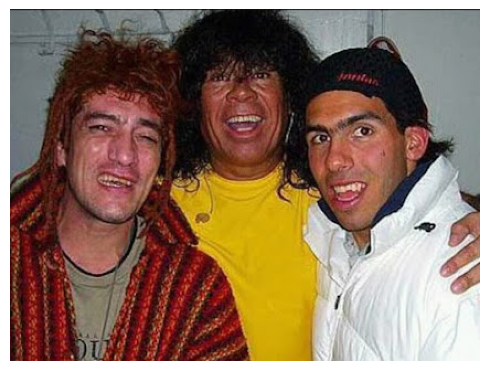

In [22]:
# Cargamos la imagen a analizar

image = keras.utils.load_img(image_file)
image = np.array(image)

visualization.plot_image_gallery(
    np.array([image]),
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

# Preparamos la imagen para el modelo
inference_resizing = keras_cv.layers.Resizing(320, 320, pad_to_aspect_ratio=True, bounding_box_format="xywh")

image_mod = inference_resizing([image])

In [23]:
# Configuración del algoritmo de NonMaxSuppression
prediction_decoder = keras_cv.layers.NonMaxSuppression(
    bounding_box_format="xywh",
    from_logits=True,
    iou_threshold=0.3,          # Al usar un valor de 1 me quedo con todos los BB encontrados, dos BB no van a tener un IoU=1 a menos que sean el mismo
    confidence_threshold=0.7    # Al usar confianza en 0 me quedo con todos los BB encontrados
)

# Creamos el modelo
model = keras_cv.models.YOLOV8Detector.from_preset(pretrained_model_name, bounding_box_format="xywh",
                                                   prediction_decoder=prediction_decoder)

1/1 [==============================] - 5s 5s/step


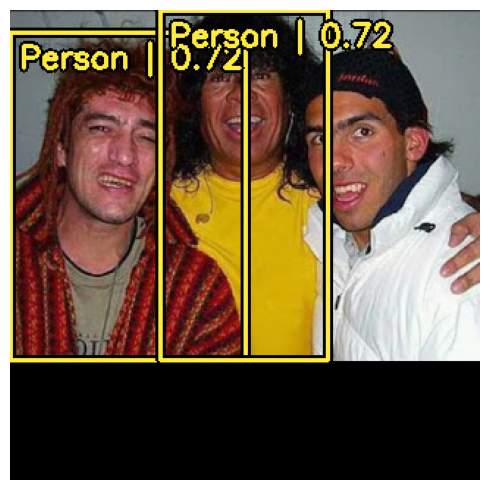

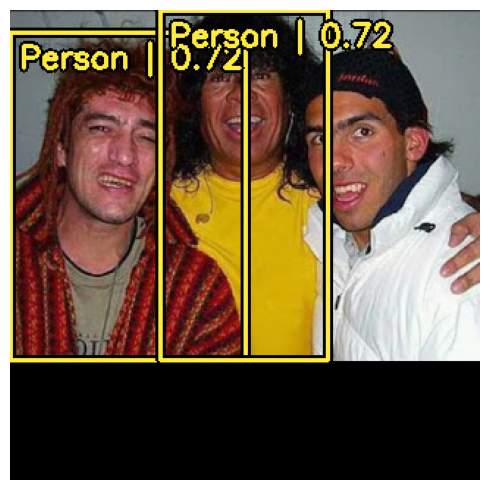

In [24]:
# Hacer la predicción

y_pred = model.predict(image_mod) # y_pred es un diccionario:
                                  # {"classes": ...,        # matriz con las clases de los objetos
                                  #  "boxes": ...,          # tensor con los bounding boxes
                                  #  "confidence": ...,     # matriz con las confianzas
                                  #  "num_detections": ...  # lista con la cantidad de objetos detectados
                                  #  }

visualization.plot_bounding_box_gallery(
    image_mod,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_dict,
)